# ML Project on Iris Dataset

In [1]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn
print("Python {}".format(sys.version))
print("Scipy {}".format(scipy.__version__))
print("Numpy {}".format(numpy.__version__))
print("Scipy {}".format(scipy.__version__))
print("Matplotlib {}".format(matplotlib.__version__))
print("Pandas {}".format(pandas.__version__))
print("Sklearn {}".format(sklearn.__version__))

Python 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
Scipy 1.4.1
Numpy 1.16.5
Scipy 1.4.1
Matplotlib 3.1.1
Pandas 0.25.1
Sklearn 0.21.3


In [2]:
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [3]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['Sepal-length', 'Sepal-width','Petal-length', 'Petal-width','Class']
dataset = read_csv(url, names=names)

In [4]:
print(dataset.shape)

(150, 5)


In [5]:
print(dataset.head(20))

    Sepal-length  Sepal-width  Petal-length  Petal-width        Class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [6]:
print(dataset.describe())

       Sepal-length  Sepal-width  Petal-length  Petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [7]:
print(dataset.groupby('Class').size())

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


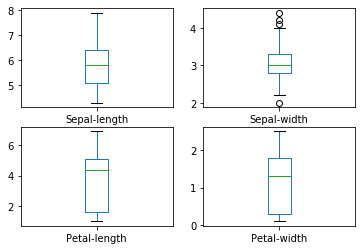

In [8]:
dataset.plot(kind='box',subplots=True, layout=(2,2), sharex=False, sharey=False)
pyplot.show()

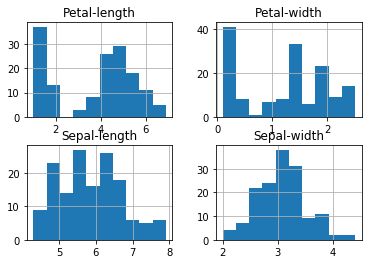

In [9]:
dataset.hist()
pyplot.show()

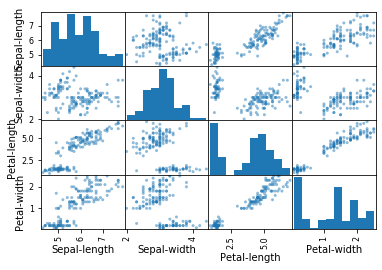

In [10]:
scatter_matrix(dataset)
pyplot.show()

In [11]:
array = dataset.values
X = array[:,0:4]
y = array[:,4]
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 1)

In [12]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class = 'ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [13]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))

LR: 0.960897 (0.052113)
LDA: 0.973974 (0.040110)
KNN: 0.957191 (0.043263)
NB: 0.948858 (0.056322)
SVM: 0.983974 (0.032083)


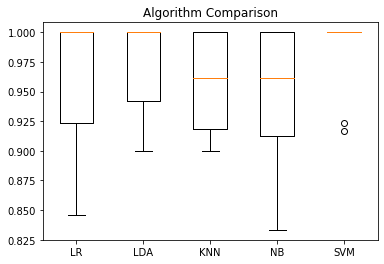

In [14]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [15]:
model = SVC(gamma = 'auto')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [18]:
print("Accuracy Score: ")
print(accuracy_score(y_test, predictions), "\n")
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions), "\n")
print("Classification Report: ")
print(classification_report(y_test, predictions))

Accuracy Score: 
0.9666666666666667 

Confusion Matrix: 
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]] 

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

